In [100]:
import pandas as pd
import csv
import numpy as np
import statistics as sc
import matplotlib.pyplot as plt

In [101]:
df0=pd.read_csv('positions_sat.csv')
df1=pd.read_csv('labels(dst).csv')
df2=pd.read_csv('solar_wind.csv')
df3=pd.read_csv('sunspots_smooth.csv')
# df0.info()
# df1.info()
# df2.info()
# df3.info()


In [102]:
def plothash(arr):
    ls={}
    for i in arr:
        if(pd.isna(i)):
            continue
        if i not in ls:
            ls[i]=1
        else:
            ls[i]+=1
    return ls

Range if : 110.18
Mode :1.94
Median : -3.535


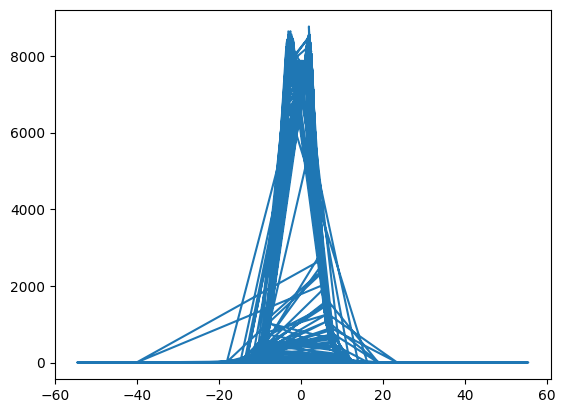

In [103]:
xx=df2['bx_gse']

# print(type(df2['bx_gse']))
# z=0
# count=0
# print(type(xx[242]))

# for i in range(len(xx)):
#     if(pd.isna(xx[i])):
#         xx[i]=0

#Statistical calculations


xmode=sc.mode(xx)
xmedian=sc.median(xx)
rangei=max(xx)-min(xx)
print(f"Range if : {rangei}")
print(f"Mode :{xmode}")
print(f"Median : {xmedian}")

# for i in xx:
#     if(pd.isna(i)):
#         xx[count]=xmedian
#     count+=1

# newxmean=sc.mean(xx)
# print(newxmean)


dicty=plothash(xx)
result=dicty.items()
data=list(result)
xaxi=[]
yaxi=[]
# print(data)
for i in data:
    xaxi.append(i[0])
    yaxi.append(i[1])
xaxi=np.array(xaxi)
yaxi=np.array(yaxi)
plt.plot(xaxi,yaxi)

In [104]:
bx_gse=np.array(df2['bx_gse'])
by_gse=np.array(df2['by_gse'])
bz_gse=np.array(df2['bz_gse'])
theta_gse=np.array(df2['theta_gse'])
phi_gse=np.array(df2['phi_gse'])
bx_gsm=np.array(df2['bx_gsm'])
by_gsm=np.array(df2['by_gsm'])
bz_gsm=np.array(df2['bz_gsm'])
theta_gsm=np.array(df2['theta_gsm'])
phi_gsm=np.array(df2['phi_gsm'])
bt=np.array(df2['bt'])
density=np.array(df2['density'])
speed=np.array(df2['speed'])
temperature=np.array(df2['temperature'])

In [108]:
datalines=[bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature]

Finding Median of the data

In [109]:
# by_gse_median=sc.median(by_gse)
# bz_gse_median=sc.median(bz_gse)
# bx_gsm_median=sc.median(bx_gsm)
# by_gsm_median=sc.median(by_gsm)
# bz_gsm_median=sc.median(bz_gsm)
# theta_gse_median=sc.median(theta_gse)
# phi_gse_median=sc.median(phi_gse)
# theta_gsm_median=sc.median(theta_gsm)
# phi_gsm_median=sc.median(phi_gsm)
# bt_median=sc.median(bt)
# density_median=sc.median(density)
# speed_median=sc.median(speed)
# temperature_median=sc.median(temperature)
medianss=[]
for i in datalines:
    medianss.append(sc.median(i))

Replacing nan values with median data

In [ ]:
def updater(arr):
    median=sc.median(arr)
    for i in range (len(arr)):
        if(pd.isna(arr[i])):
            arr[i]=median
    return arr

In [111]:
# for i in range(len(bx_gse)):
#     if(pd.isna(bx_gse[i])):
#         bx_gse[i]=xmedian
#     if(pd.isna(by_gse[i])):
#         by_gse[i]=by_gse_median
#     if(pd.isna(bz_gse[i])):
#         bz_gse[i]=bz_gse_median
#     if(pd.isna(bx_gsm[i])):
#         bx_gsm[i]=bx_gsm_median
#     if(pd.isna(by_gsm[i])):
#         by_gsm[i]=by_gsm_median
#     if(pd.isna(bz_gsm[i])):
#         bz_gsm[i]=bz_gsm_median
#     if(pd.isna(theta_gse[i])):
#         theta_gse[i]=theta_gse_median
#     if(pd.isna(phi_gse[i])):
#         phi_gse[i]=phi_gse_median
#     if(pd.isna(theta_gsm[i])):
#         theta_gsm[i]=theta_gsm_median
#     if(pd.isna(phi_gsm[i])):
#         phi_gsm[i]=phi_gsm_median
#     if(pd.isna(bt[i])):
#         bt[i]=bt_median
#     if(pd.isna(density[i])):
#         density[i]=density_median
#     if(pd.isna(speed[i])):
#         speed[i]=speed_median
#     if(pd.isna(temperature[i])):
#         temperature[i]=temperature_median
for i in range (len(datalines)):
    for j in range (len(datalines[i])):
        if(pd.isna(datalines[i][j])):
            datalines[i][j]=medianss[i]


In [112]:
print(len(datalines[i]))

8392320


: 

Checker function to check if all values have been updated

In [ ]:
def checker(arr):
    cou=0
    for i in arr:
        if(pd.isna(i)):
            cou+=1
    return (f"There are {cou} nan values")
checker(density)

In [ ]:
def summa(arr):
    nsum=0
    for i in arr:
        nsum+=i
    return nsum

Since there are only hourly labels avalaible we convert the minute data to hourly data by taking mean of per hour data and storing them in a list

In [ ]:
def converter(arrayold):
    arraynew=[]
    counter=60
    lc=0
    while(counter<=len(arrayold)):
        sumarr=arrayold[lc:counter]
        arraynew.append(summa(sumarr)/60)
        lc+=60
        counter+=60
    return arraynew

In [ ]:
bx_gse=converter(bx_gse)
by_gse=converter(by_gse)
bz_gse=converter(bz_gse)
theta_gse=converter(theta_gse)
phi_gse=converter(phi_gse)
bx_gsm=converter(bx_gsm)
by_gsm=converter(by_gsm)
bz_gsm=converter(bz_gsm)
theta_gsm=converter(theta_gsm)
phi_gsm=converter(phi_gsm)
bt=converter(bt)
density=converter(density)
speed=converter(speed)
temperature=converter(temperature)


In [ ]:
data1=[bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature]
for i in data1:
    print(len(i))

In [ ]:
index_values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
column_values=[]
for i in range(len(bx_gse)):
    column_values.append(i)
dff=pd.DataFrame(data=[bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature],
                 index=index_values,
                 columns=column_values)
print(dff)